# Classification of Diabetes

### Database used: Pima Indians Diabetes Database
Medical Question: Is it possible to predict the onset of diabetes based on certain diagnostic measures?

The dataset (diabetes.csv) used for this analysis is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of using this dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. 

In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content:
The datasets consists of several medical predictor variables and one target variable, Outcome. 
Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

References:
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press. (RIC note: This modeling from this paper uses linear regression and neural networks)

Goal:
Build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes using simple explainable model.



### Specific features variables (predictor variables) included in this dataset:

Pregnancies - Number of times pregnant

Glucose - Plasma glucose concentration - a 2 hours in an oral glucose tolerance test

BloodPressure - Diastolic blood pressure (mm Hg)

SkinThickness - Triceps skin fold thickness (mm)

Insulin - 2-Hour serum insulin (mu U/ml)

BMI - Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction - Diabetes pedigree function

Age - Age (years)

==========================================================================================================

Outcome - Class variable (0 or 1) 268 of 768 are 1 (have diabetes), the others are 0 (don't have diabetes)



<h3>Supervised Learning - potential types of models</h3>
<ol>
  <li>Linear Models</li>
  <li>Linear and Quadratic Discriminant Analysis</li>
  <li>Kernel ridge regression</li>
  <li>Support Vector Machines</li>
  <li>Stochastic Gradient Descent</li>
  <li><b>Nearest Neighbors</b></li>
  <li>Gaussian Processes</li>
  <li>Cross decomposition</li>
  <li>Naive Bayes</li>
  <li>Decision Trees</li>
  <li>Ensemble methods</li>
  <li>Multiclass and multioutput algorithms</li>
  <li>Feature selection</li>
  <li>Semi-supervised learning</li>
  <li>Isotonic regression</li>
  <li>Probability calibration</li>
  <li>Neural network models (supervised)</li>
</ol>



<h3>Unsupervised Learning - potential types of models</h3>
<ol>
  <li>Random Forests</li>
  <li>Gradient Boosted Trees</li>
  <li>Neural network models (unsupervised) and Deep Learning</li>
  <li>Gaussian mixture models</li>
  <li>Manifold learning</li>
  <li>Clustering</li>
  <li>Biclustering</li>
  <li>Decomposing signals in components (matrix factorization problems)</li>
  <li>Covariance estimation</li>
  <li>Novelty and Outlier Detection</li>
  <li>Density Estimation</li>
</ol>    


### Bring in required software libraries/packages

In [7]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')
#ggplot is R based visualisation package that provides better graphics with higher level of abstraction

### Read in the data

In [8]:
#Loading the dataset
diabetes_data = pd.read_csv('diabetes.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Analyze the data

In [9]:
## obtain information about the data types,columns, null value counts, memory usage etc
## function reference : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### DataFrame.describe() method generates descriptive statistics
These statistics summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

The statistics below are generated by the describe() method:

count - the number of NoN-empty rows in a feature.
mean - the mean value of that feature.
std - the Standard Deviation Value of that feature.
min - the minimum value of that feature.
25%, 50%, and 75% - the percentile/quartile of each features. This quartile information helps us to detect Outliers.
max - the maximum value of that feature.

In [10]:
## basic statistic details about the data (note only numerical columns would be displayed here unless parameter include="all")
## for reference: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas.DataFrame.describe
diabetes_data.describe()

## Also see :
##to return columns of a specific dtype: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.select_dtypes.html#pandas.DataFrame.select_dtypes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Transpose this information

In [11]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### The Question from this summary is: Can minimum value of columns below be zero (0)?

On these columns, a value of zero does not make sense and thus indicates missing value.  The following columns or variables have an invalid zero value:
<ul>
<li>Glucose</li>
<li>BloodPressure</li>
<li>SkinThickness</li>
<li>Insulin</li>
<li>BMI</li>
</ul>    
(note - the zero value for Pregnancies can be valid)

It is better to replace zeros with NaN since after that counting them would be easier and zeros need to be replaced with suitable values

In [12]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


<br>
<br>
<h3>Analzyse the data distribution for each of these fields to properly handle estimation of values for the NaN values</h3>
<br>

### Skewness
A left-skewed distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.

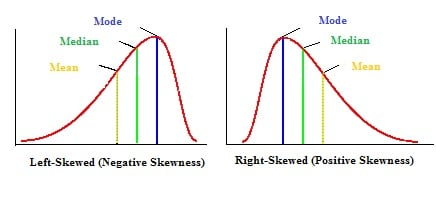

More about skewness
https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/skewed-distribution/


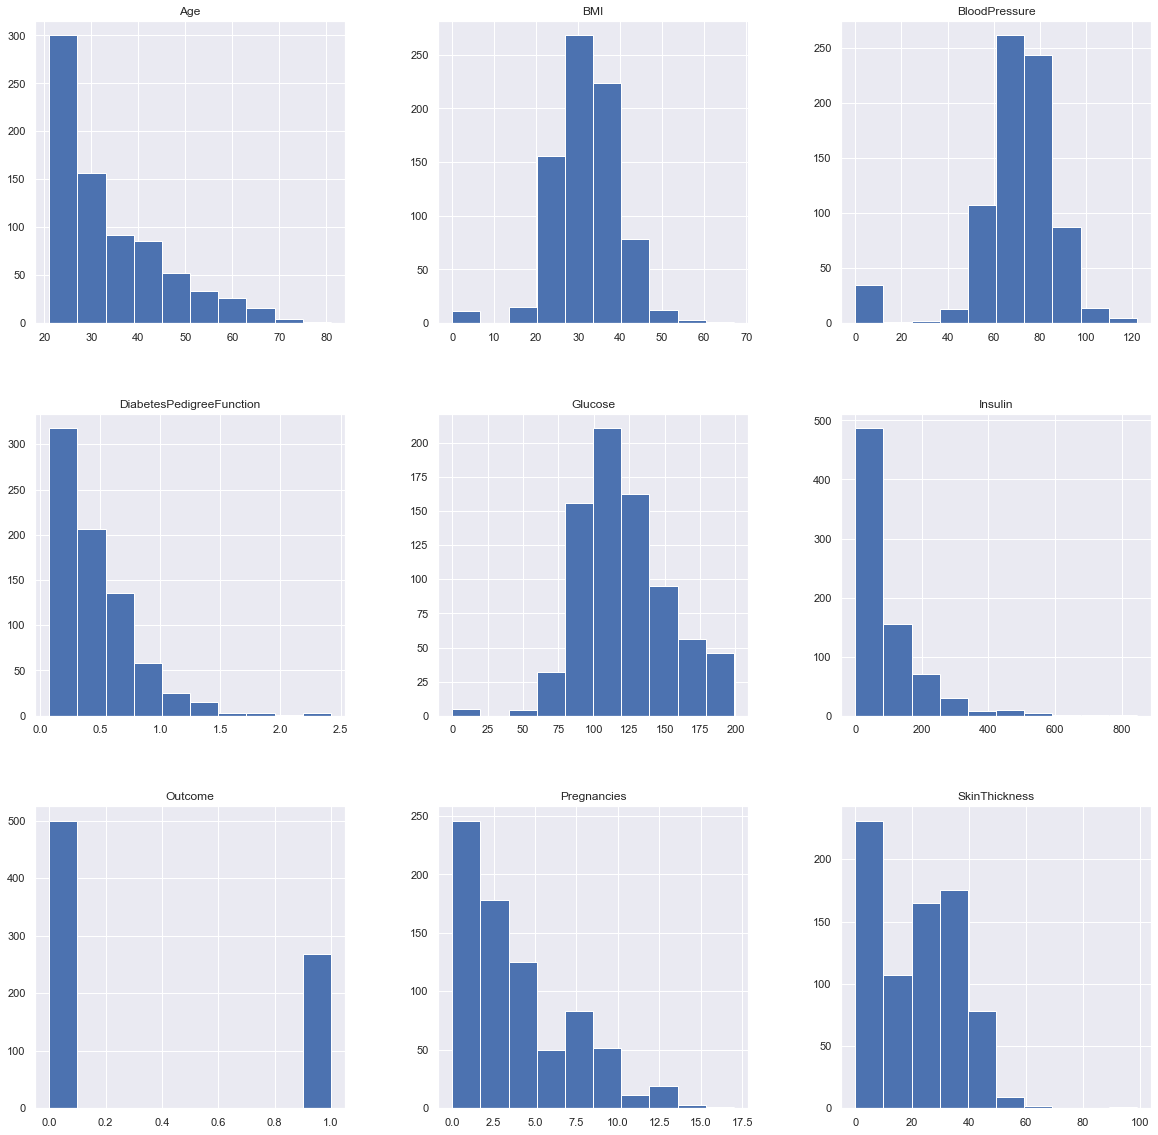

In [13]:
p = diabetes_data.hist(figsize = (20,20))

### Try to impute values for the NaN values in columns based on their distribution

In [14]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

### Now plot after removing all NaN values

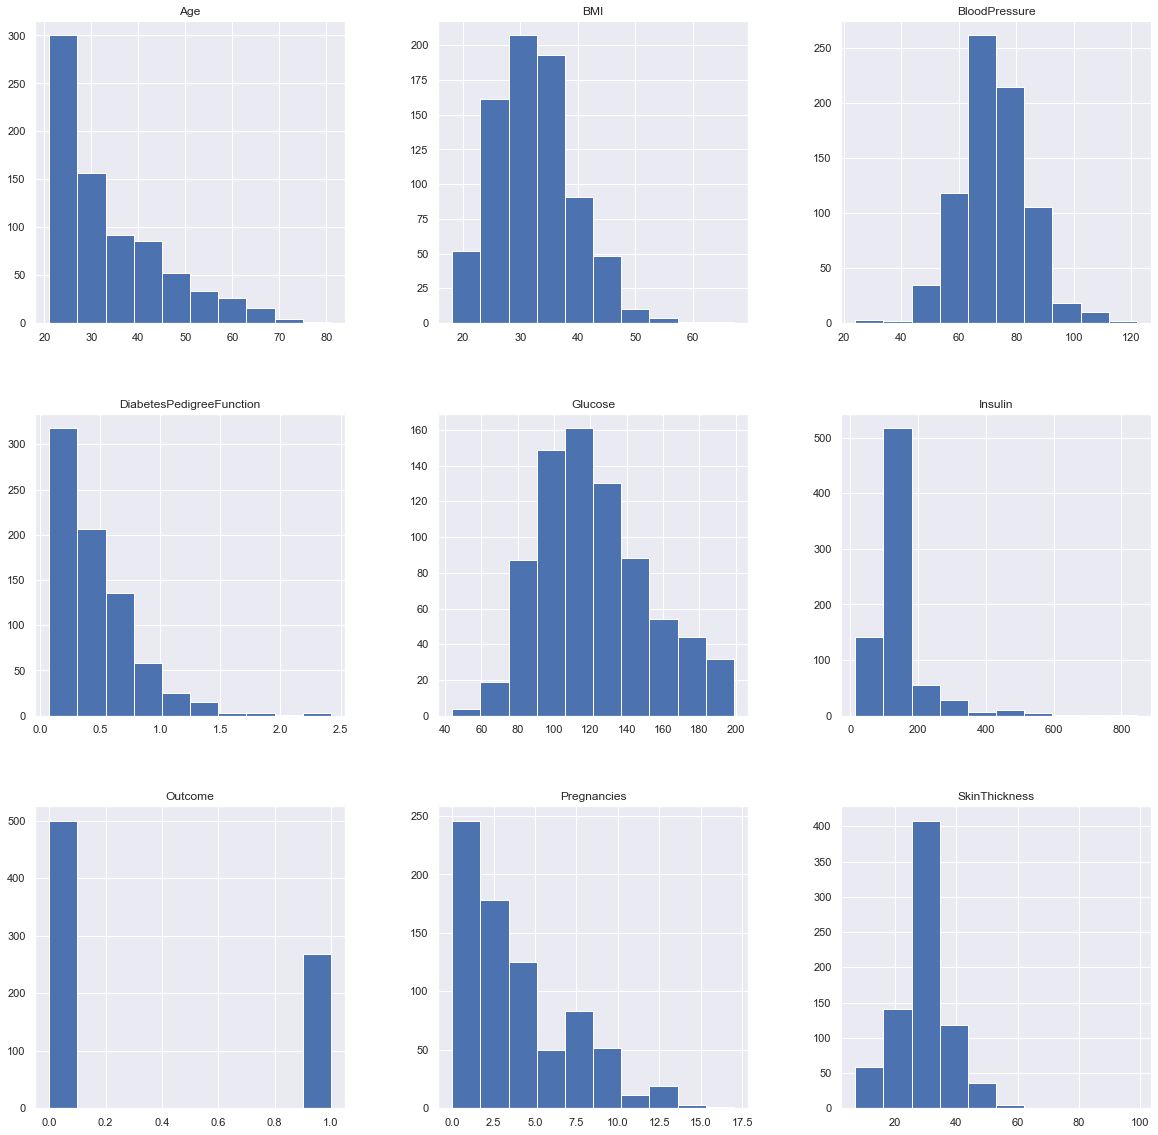

In [15]:
p = diabetes_data_copy.hist(figsize = (20,20))

In [16]:
### observing the shape of the data
diabetes_data.shape

(768, 9)

In [17]:
## data type analysis
#plt.figure(figsize=(5,5))
#sns.set(font_scale=2)
#sns.countplot(y=diabetes_data.dtypes ,data=diabetes_data)
#plt.xlabel("count of each data type")
#plt.ylabel("data types")
#plt.show()

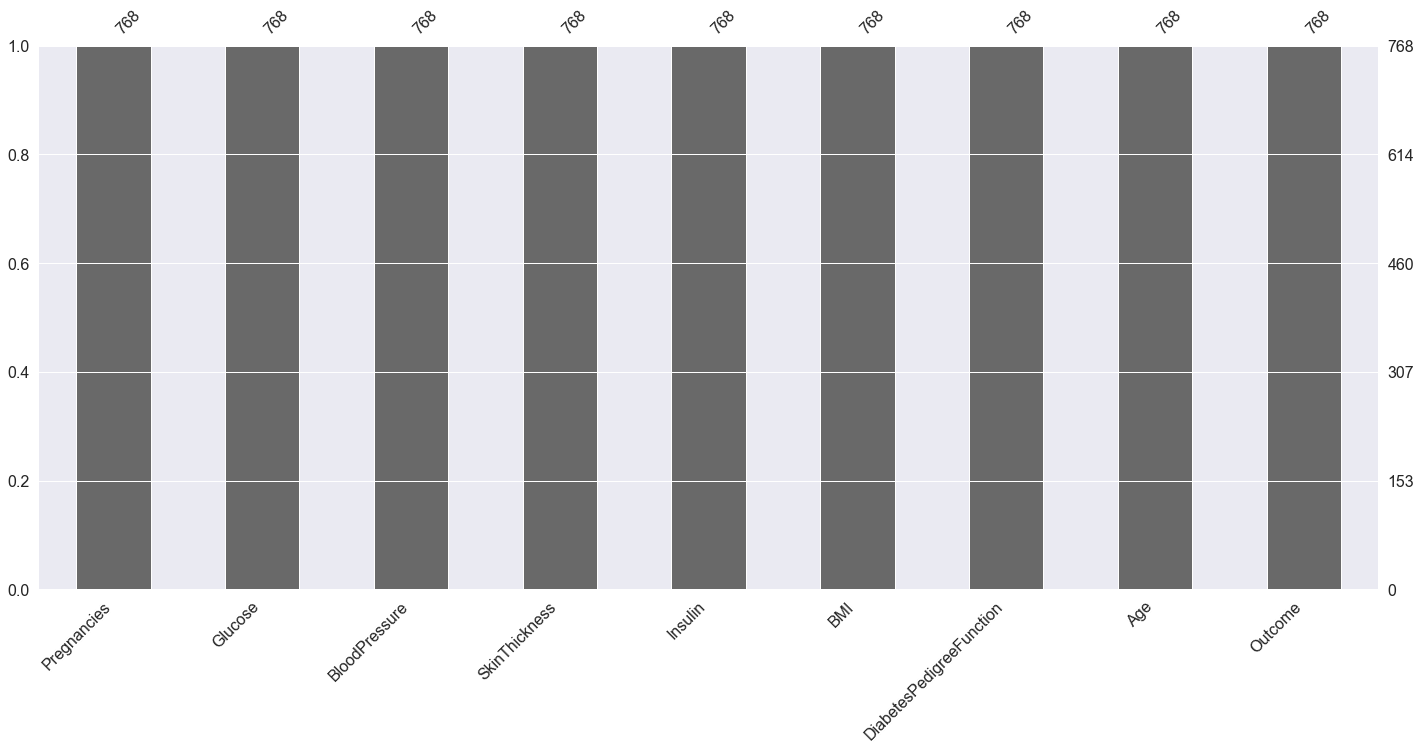

In [18]:
## null count analysis
import missingno as msno
p=msno.bar(diabetes_data)

0    500
1    268
Name: Outcome, dtype: int64


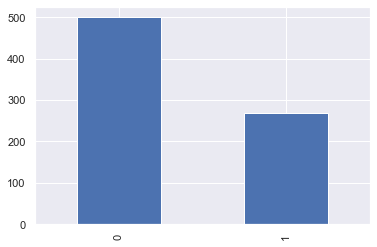

In [19]:
## checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = diabetes_data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_data.Outcome.value_counts())
p=diabetes_data.Outcome.value_counts().plot(kind="bar")

### This graph (above) shows that the data is biased towards datapoints having outcome value as 0.
An outcome of 0 means that diabetes was not present. In this dataset, the number of non-diabetics is almost twice the number of diabetic patients.

### Scatter matrix of uncleaned data

In [20]:
#from pandas.tools.plotting import scatter_matrix
#p=scatter_matrix(diabetes_data,figsize=(25, 25))
#p=sns.pairplot(diabetes_data, hue = 'Outcome')

### The pairs plot builds on two basic figures, the histogram and the scatter plot. 
The histogram on the diagonal allows us to see the distribution of a single variable.
The scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.¶
For Reference: https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

### Pair plot using the clean data

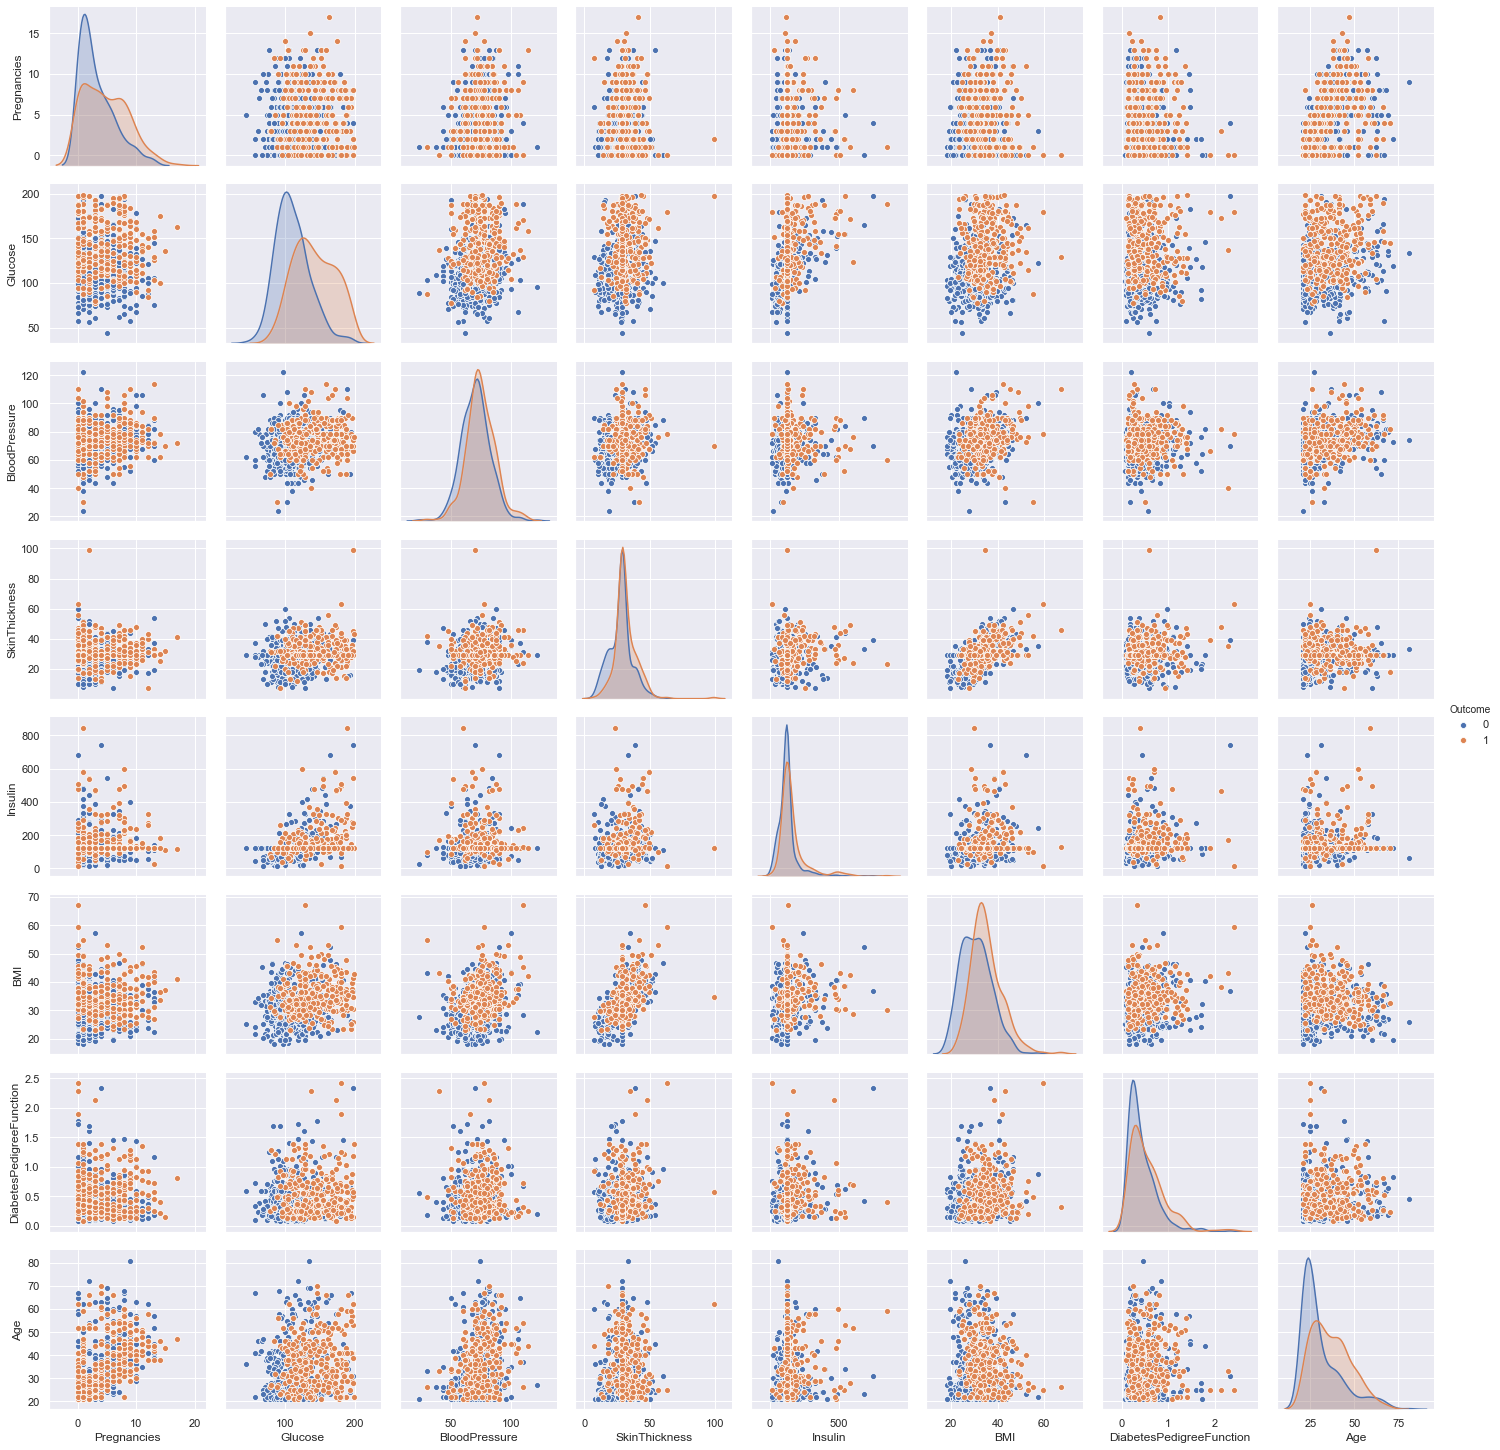

In [21]:
p=sns.pairplot(diabetes_data_copy, hue = 'Outcome')
print(p)

### Pearson's Correlation Coefficient: 
helps determine the relationship between two quantities. It gives you the measure of the strength of association 
between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they 
are highly correlated and 0 means no correlation.


### A heat map is a two-dimensional representation of information with the help of colors. 
Heat maps can help the user visualize simple or complex information.

Heatmap for unclean data

In [22]:
#plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
#p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

Heatmap for clean data

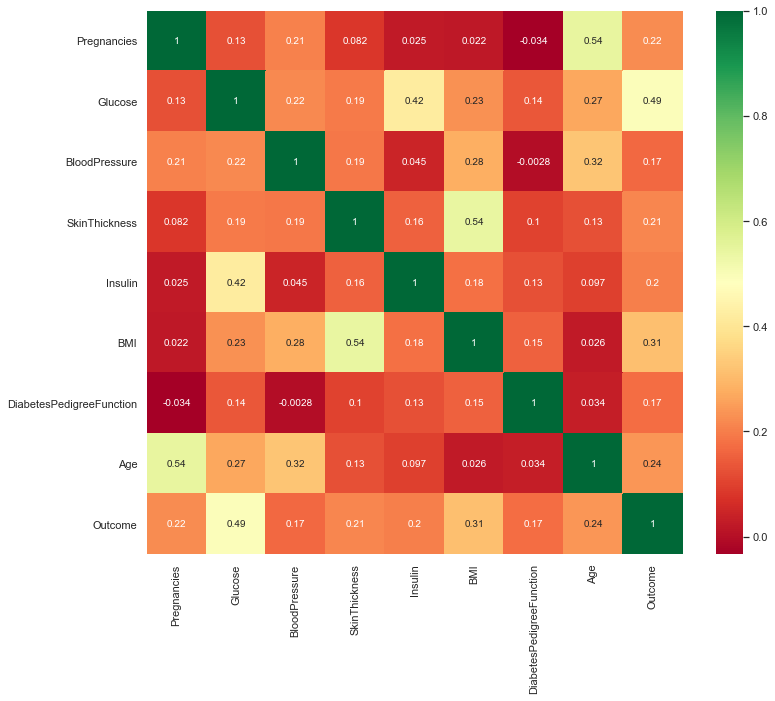

In [23]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data_copy.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

### Scaling the data
data Z is rescaled such that μ = 0 and 𝛔 = 1, and is done through this formula:

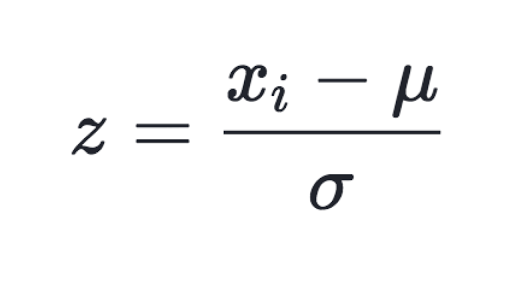

to learn more about scaling techniques¶
https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc https://machinelearningmastery.com/rescaling-data-for-machine-learning-in-python-with-scikit-learn/

In [24]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [25]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [26]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,-3.561966e-16,6.915764e-16,-1.526557e-16,1.503427e-17,2.613650e-16,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.554131e+00,-4.004245e+00,-2.516429e+00,-1.467353e+00,-2.074783e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-7.212214e-01,-6.953060e-01,-4.675972e-01,-2.220849e-01,-7.212087e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.540881e-01,-1.675912e-02,-1.230129e-02,-1.815412e-01,-2.258989e-02,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.103090e-01,6.282695e-01,3.291706e-01,-1.554775e-01,6.032562e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.541850e+00,4.102655e+00,7.955377e+00,8.170442e+00,5.042397e+00,5.883565e+00,4.063716e+00


In [27]:
#X = diabetes_data.drop("Outcome",axis = 1)
y = diabetes_data_copy.Outcome

### Why Scaling the data for KNN?
it is always advisable to bring all the features to the same scale for applying distance based algorithms like KNN.
Let's see an example of distance calculation using two features whose magnitudes/ranges vary greatly.
Euclidean Distance = [(100000–80000)^2 + (30–25)^2]^(1/2)

We can imagine how the feature with greater range with overshadow or dimenish the smaller feature completely and this will impact the performance of all distance based model as it will give higher weightage to variables which have higher magnitude.

### Test Train Split and Cross Validation methods
Train Test Split : To have unknown datapoints to test the data rather than testing with the same points with which the model was trained. This helps capture the model performance much better.

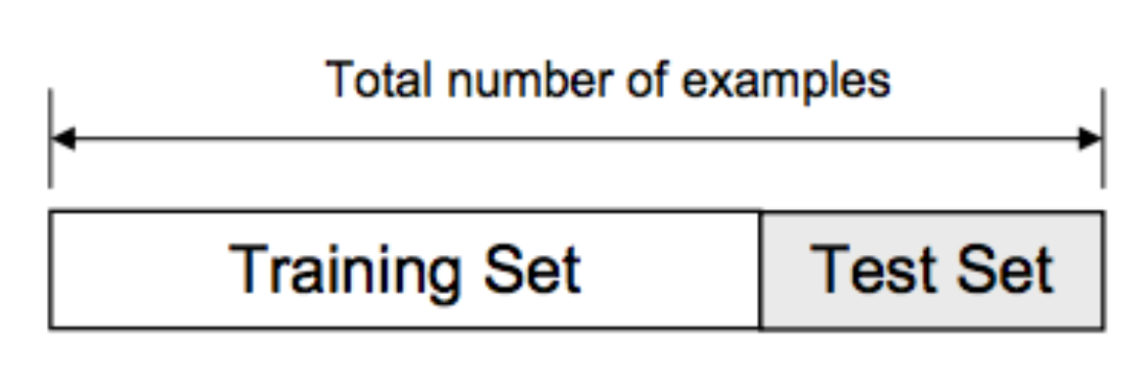

Cross Validation: When model is split into training and testing it can be possible that specific type of data point may go entirely into either training or testing portion. This would lead the model to perform poorly. Hence over-fitting and underfitting problems can be well avoided with cross validation techniques

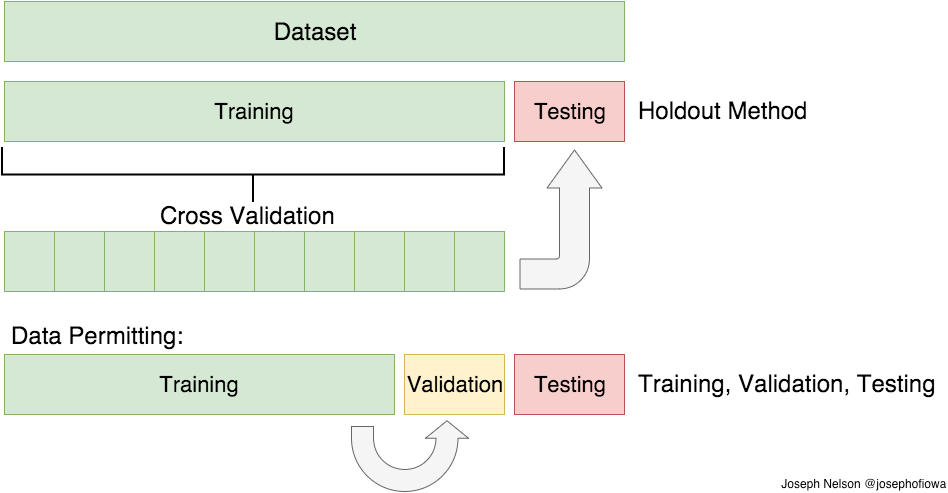

About Stratify : Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

For Reference : https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

<br>
<br>
<h1>Break to explain KKN model</h1>
<br>
<h3>Use KNN modeling algorithm because it is easy to understand and explain</h3>
<br>
<h3>The Euclidean distance between two points in Euclidean space is the length of a line segment between the two points.</h3>
<br>
<h3>The Euclidean distance formula is used to find the distance between two points on a plane. This formula says the distance between two points (x1 1 , y1 1 ) and (x2 2 , y2 2 ) is d = √[(x2 – x1)2 + (y2 – y1)2].</h3>
<br>

<br>
<br>
<h2>Now actually start building knn model for analysis</h2>
<br>

In [28]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05,random_state=42, stratify=y)

### Save split of training and testing data to files

### Training Data: Reverse scaling to allow human readable interpretation

In [29]:
from sklearn import preprocessing
X_trainOrig = sc_X.inverse_transform(X_train)

In [30]:
df = pd.DataFrame(data=X_trainOrig)

df.to_csv('diabetesTrain_95_5.csv', index=False)

print(df)

       0      1     2     3      4     5      6     7
0    0.0  165.0  76.0  43.0  255.0  47.9  0.259  26.0
1    0.0  141.0  84.0  26.0  125.0  32.4  0.433  22.0
2    6.0  194.0  78.0  29.0  125.0  23.5  0.129  59.0
3    5.0   44.0  62.0  29.0  125.0  25.0  0.587  36.0
4    6.0  105.0  80.0  28.0  125.0  32.5  0.878  26.0
..   ...    ...   ...   ...    ...   ...    ...   ...
724  3.0  128.0  72.0  25.0  190.0  32.4  0.549  27.0
725  4.0   76.0  62.0  29.0  125.0  34.0  0.391  25.0
726  1.0   97.0  70.0  40.0  125.0  38.1  0.218  30.0
727  2.0  101.0  58.0  17.0  265.0  24.2  0.614  23.0
728  4.0  144.0  58.0  28.0  140.0  29.5  0.287  37.0

[729 rows x 8 columns]


In [31]:
y_train.to_csv('diabetesTrainOutput_95_5.csv', index=False)

### Testing Data: Reverse scaling to allow human readable interpretation

In [32]:
from sklearn import preprocessing
X_testOrig = sc_X.inverse_transform(X_test)

In [33]:
df = pd.DataFrame(data=X_testOrig)

df.to_csv('diabetesTest_95_5.csv', index=False)

print(df)

       0      1           2     3      4     5      6     7
0    0.0  131.0   72.405184  29.0  125.0  43.2  0.270  26.0
1    1.0   93.0   70.000000  31.0  125.0  30.4  0.315  23.0
2    7.0  106.0   92.000000  18.0  125.0  22.7  0.235  48.0
3    3.0  158.0   70.000000  30.0  328.0  35.5  0.344  35.0
4    0.0   57.0   60.000000  29.0  125.0  21.7  0.735  67.0
5    3.0  193.0   70.000000  31.0  125.0  34.9  0.241  25.0
6    9.0  140.0   94.000000  29.0  125.0  32.7  0.734  45.0
7    2.0  146.0   76.000000  35.0  194.0  38.2  0.329  29.0
8    3.0   78.0   50.000000  32.0   88.0  31.0  0.248  26.0
9    4.0  132.0   72.405184  29.0  125.0  32.9  0.302  23.0
10   1.0   83.0   68.000000  29.0  125.0  18.2  0.624  27.0
11   0.0  134.0   58.000000  20.0  291.0  26.4  0.352  21.0
12   4.0   94.0   65.000000  22.0  125.0  24.7  0.148  21.0
13   3.0  111.0   62.000000  29.0  125.0  22.6  0.142  21.0
14  11.0  143.0   94.000000  33.0  146.0  36.6  0.254  51.0
15   1.0  153.0   82.000000  42.0  485.0

In [34]:
y_test.to_csv('diabetesTestOutput_95_5.csv', index=False)
#print(y_test)

### Fit the model for various values of 'k'

In [35]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)

    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [36]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [37]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 84.61538461538461 % and k = [5]


### Visual of the model results for various values of 'k'

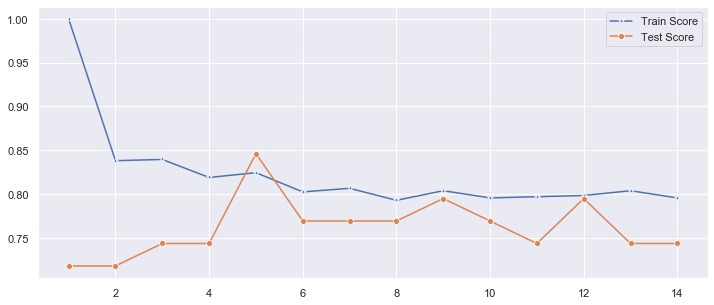

In [38]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

### The best result is captured at k = 5 hence 5 is used for the final model

In [39]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(5)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8461538461538461

### Actual outcomes for test data

In [40]:
#print(y_test)
#type(y_test)

### Predicted outcomes for test data

In [41]:
y_predicted = knn.predict(X_test)
#print(y_predicted)
print(type(y_predicted))

df = pd.DataFrame(data=y_predicted)
df.to_csv('diabetesTestPredicted_95_5.csv', header=None, index=False)
#print(df)

<class 'numpy.ndarray'>


### trying to plot decision boundary 

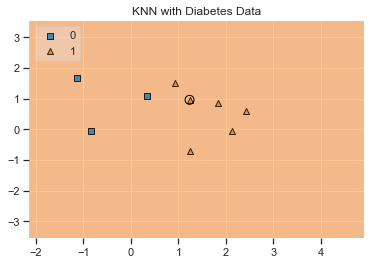

In [42]:
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

# Adding axes annotations
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
plt.title('KNN with Diabetes Data')
plt.show()

### Model Performance Analysis
1. Confusion Matrix
The confusion matrix is a technique used for summarizing the performance of a classification algorithm i.e. it has binary outputs.

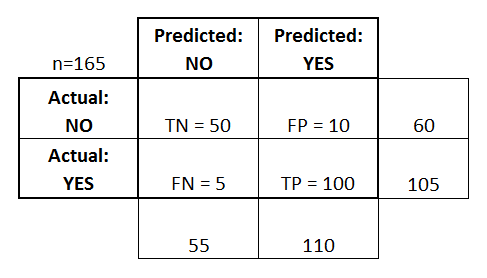

In the famous cancer example:
Cases in which the doctor predicted YES (they have the disease), and they do have the disease will be termed as TRUE POSITIVES (TP). The doctor has correctly predicted that the patient has the disease.
Cases in which the doctor predicted NO (they do not have the disease), and they don’t have the disease will be termed as TRUE NEGATIVES (TN). The doctor has correctly predicted that the patient does not have the disease.
Cases in which the doctor predicted YES, and they do not have the disease will be termed as FALSE POSITIVES (FP). Also known as “Type I error”.
Cases in which the doctor predicted NO, and they have the disease will be termed as FALSE NEGATIVES (FN). Also known as “Type II error”.

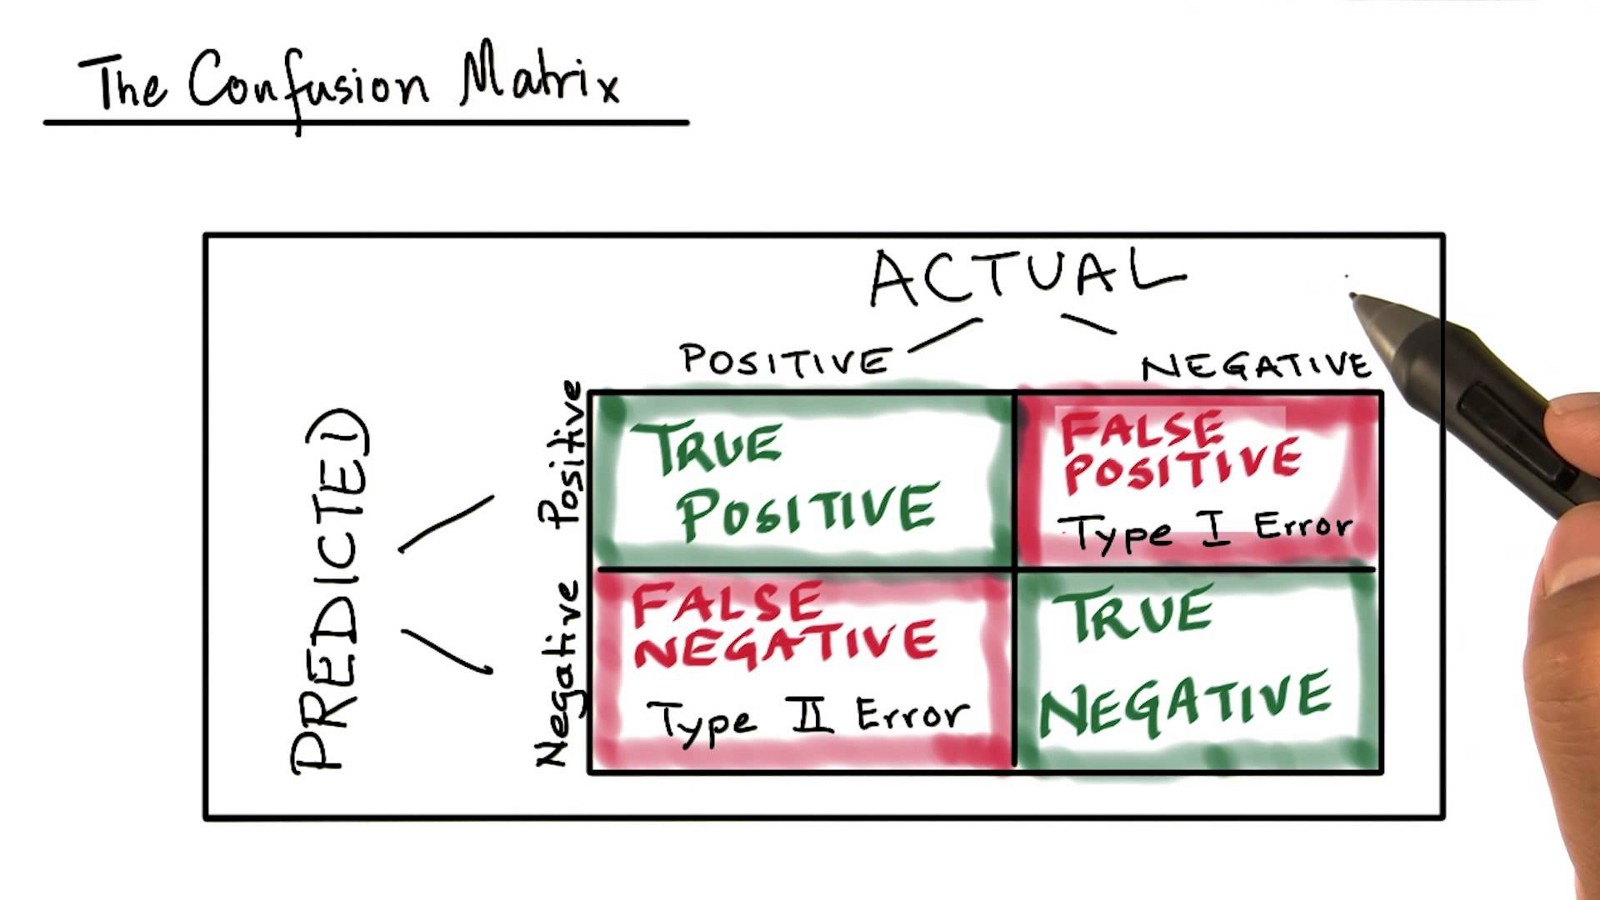

For Reference: https://medium.com/@djocz/confusion-matrix-aint-that-confusing-d29e18403327

In [43]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,23,2,25
1,4,10,14
All,27,12,39


Text(0.5, 12.5, 'Predicted label')

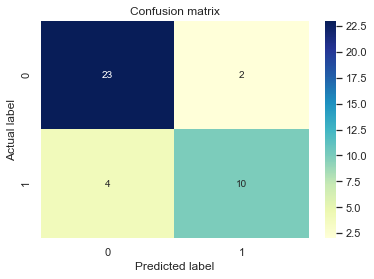

In [44]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 2. Classification Report
Report which includes Precision, Recall and F1-Score.

Precision Score
    TP – True Positives
    FP – False Positives

    Precision – Accuracy of positive predictions.
    Precision = TP/(TP + FP)


Recall Score
    FN – False Negatives

    Recall(sensitivity or true positive rate): Fraction of positives that were correctly identified.
    Recall = TP/(TP+FN)

F1 Score
    F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers.
    F1 Score takes into account precision and the recall. 
    It is created by finding the the harmonic mean of precision and recall.

    F1 = 2 x (precision x recall)/(precision + recall)



Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.

Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? A recall greater than 0.5 is good.

Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

F1 Score = 2(Recall Precision) / (Recall + Precision)

For Reference: http://joshlawman.com/metrics-classification-report-breakdown-precision-recall-f1/ : https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

In [45]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        25
           1       0.83      0.71      0.77        14

    accuracy                           0.85        39
   macro avg       0.84      0.82      0.83        39
weighted avg       0.85      0.85      0.84        39



### 3. ROC - AUC
ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a patient has a disease or no). Better models can accurately distinguish between the two. Whereas, a poor model will have difficulties in distinguishing between the two

Well Explained in this video: https://www.youtube.com/watch?v=OAl6eAyP-yo



In [46]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

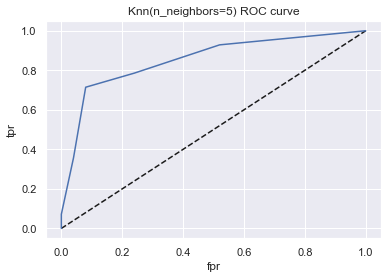

In [47]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=5) ROC curve')
plt.show()

In [48]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8528571428571429

### Hyper Parameter optimization
Grid search is an approach to hyperparameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid.

Let’s consider the following example:

Suppose, a machine learning model X takes hyperparameters a1, a2 and a3. In grid searching, you first define the range of values for each of the hyperparameters a1, a2 and a3. You can think of this as an array of values for each of the hyperparameters. Now the grid search technique will construct many versions of X with all the possible combinations of hyperparameter (a1, a2 and a3) values that you defined in the first place. This range of hyperparameter values is referred to as the grid.

Suppose, you defined the grid as: a1 = [0,1,2,3,4,5] a2 = [10,20,30,40,5,60] a3 = [105,105,110,115,120,125]

Note that, the array of values of that you are defining for the hyperparameters has to be legitimate in a sense that you cannot supply Floating type values to the array if the hyperparameter only takes Integer values.

Now, grid search will begin its process of constructing several versions of X with the grid that you just defined.

It will start with the combination of [0,10,105], and it will end with [5,60,125]. It will go through all the intermediate combinations between these two which makes grid search computationally very expensive.

In [49]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7721840251252015
Best Parameters: {'n_neighbors': 25}


<br>
<br>
<h1>Linear Regression Model</h1>
<br>

<h3>Linear models make a prediction using a linear function of input feature variables.</h3>
<br>
<h4>For regression, the general prediction formula for a linear model is:</h4>
    
    y = (w[0] * x[0]) + (w[1] * x[1]) + ... (w[p] * x[p]) + b
    
Where x[0] to x[p] are the feature variables with the number of features equat to (p + 1).

w and b are parameters of the model that are learned.

y is the prediction that the model makes.

<br>
<h4>For a dataset with a single feature, the formula resolves to:</h4>

    y = (w[0] * x[0]) + b
    
Which is the equation for a line where w[0] is the slope and b is the y-axis offset.

<br>
<h4>Linear Regression (Ordinary Least Squares)</h4>

Minimize the mean squared error between predictions and the true regression targets on the training set.

The mean squared error is the sum of the squared differences between the predictions and the true values, divided by the number of samples.

Note: In scikit-learn, linear regression has no parameters - which is a benefit, but there is also no way to control model complexity.


In [50]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [ 0.06754624  0.19735014 -0.01114774 -0.00107643 -0.00381203  0.09995533
  0.04374178  0.02272283]
lr.intercept_: 0.34900886554645244


In [51]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.32
Test set score: 0.33


<h3>Ridge Regression - </h3>
<h4>Regularization - make magnitutde of coefficients as small as possible (L2 Regularization)</h4>

In [52]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("ridge.coef_:", ridge.coef_)
print("ridge.intercept_:", ridge.intercept_)

ridge.coef_: [ 0.06742304  0.19700531 -0.01103847 -0.00095154 -0.00365037  0.09977126
  0.04371763  0.02279003]
ridge.intercept_: 0.3490104257506562


In [53]:
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.32
Test set score: 0.33


In [54]:
ridgeA10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridgeA10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridgeA10.score(X_test, y_test)))

Training set score: 0.32
Test set score: 0.33


<h3>Lasso Regression - </h3>
<h4>Regularization - make magnitutde of coefficients as small as possible</h4>
<h4>Some coefficients are exactly zero (L1 Regularization)</h4>

In [55]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("lasso.coef_:", lasso.coef_)
print("lasso.intercept_:", lasso.intercept_)
print("Number of features used:", np.sum(lasso.coef_ != 0))

lasso.coef_: [0. 0. 0. 0. 0. 0. 0. 0.]
lasso.intercept_: 0.3484224965706447
Number of features used: 0


In [56]:
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

Training set score: 0.00
Test set score: -0.00


In [57]:
lasso001 = Lasso(alpha=0.001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))

Training set score: 0.32
Test set score: 0.33


<br>
<br>
<h1>Logistic Regression Model</h1>
<br>

In [58]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)
model.score(X_train,y_train)



0.7764060356652949

In [59]:
y_pred = model.predict(X_test)
#print(y_test)
model.score(X_test,y_test)

0.7435897435897436

In [60]:
print(y_pred)
model.score(X_test,y_pred)

[0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1
 0 1]


1.0

<br>
<br>
<h1>Support Vector Machines(SVM)</h1>
<br>

Implement SVC with Linear Kernel

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [62]:
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)
X_train_scaled = (X_train - min_on_training) / range_on_training
#print("Minimum for each feature\n", X_train_scaled.min(axis=0))
#print("Maximum for each feature\n", X_train_scaled.max(axis=0))

model = SVC(random_state=0, kernel='rbf')
#model = SVC(random_state=0, kernel='rbf', C=0.1000, gamma=0.1000)
#model = SVC(random_state=0, kernel='rbf', C=1000, gamma=0.1000)
#model = SVC(random_state=0, kernel='rbf', C=1000, gamma=10.0000)
model.fit(X_train, y_train)
model.score(X_train, y_train)

# Manual Scaling approach
#model2 = SVC(random_state=0, kernel='rbf')
#model2.fit(X_train_scaled, y_train)
#model2.score(X_train_scaled, y_train)

0.823045267489712

In [63]:
y_pred = model.predict(X_test)
print(y_pred)
print(type(y_pred))
model.score(X_test, y_test)


[0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1
 0 1]
<class 'numpy.ndarray'>


0.7692307692307693

In [64]:
#print(y_test)

<h1>Decision Trees</h1>

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

In [67]:
print("Accuracy on Training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on Test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on Training set: 1.000
Accuracy on Test set: 0.769


<h3>Now restrict the depth of the tree - decreases overfitting</h3>
<h3>Should lower accuracy of training set, but improve accuracy of test set</h3>

In [68]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [69]:
print("Accuracy on Training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on Test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on Training set: 0.787
Accuracy on Test set: 0.718


<h3>Visualization of the Decision Tree</h3>

In [70]:
from sklearn.tree import export_graphviz

In [71]:
export_graphviz(tree, out_file="tree.dot", class_names=["Yes-Diabetes", "No-Diabetes"],
               feature_names=X.columns, impurity=False, filled=True)

In [72]:
import graphviz

In [73]:
with open("tree.dot") as f:
    dot_graph = f.read()
#display(graphviz.Source(dot_graph))
g = graphviz.Source(dot_graph)
print(type(g))
#g.view()
print (g.source)
#display(g)

<class 'graphviz.files.Source'>
digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="Glucose <= 0.717\nsamples = 729\nvalue = [475, 254]\nclass = Yes-Diabetes", fillcolor="#f3c4a3"] ;
1 [label="Age <= -0.403\nsamples = 565\nvalue = [430, 135]\nclass = Yes-Diabetes", fillcolor="#eda977"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Glucose <= 0.191\nsamples = 301\nvalue = [263, 38]\nclass = Yes-Diabetes", fillcolor="#e99356"] ;
1 -> 2 ;
3 [label="BMI <= 1.884\nsamples = 256\nvalue = [234, 22]\nclass = Yes-Diabetes", fillcolor="#e78d4c"] ;
2 -> 3 ;
4 [label="samples = 252\nvalue = [233, 19]\nclass = Yes-Diabetes", fillcolor="#e78b49"] ;
3 -> 4 ;
5 [label="samples = 4\nvalue = [1, 3]\nclass = No-Diabetes", fillcolor="#7bbeee"] ;
3 -> 5 ;
6 [label="BMI <= -0.532\nsamples = 45\nvalue = [29, 16]\nclass = Yes-Diabetes", fillcolor="#f3c7a6"] ;
2 -> 6 ;
7 [label="samples = 17\nvalue = [15, 2]\nclass = Yes-Diabetes", fillcolor="#e89253"] ;
6 -> 

<h3>Determine importance of each feature variable</h3>

In [74]:
print("Feature Importances:")
print(tree.feature_importances_)
print(diabetes_data_copy.shape[1])
print(X.shape[1])

Feature Importances:
[0.         0.62753227 0.         0.01302845 0.         0.17101633
 0.01411545 0.1743075 ]
9
8


In [75]:
def plot_feature_importance_diabetes(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_data_copy.columns)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.ylim(-1, n_features)


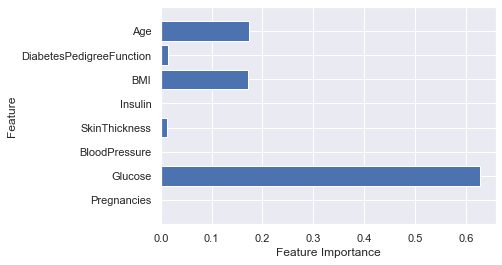

In [76]:
plot_feature_importance_diabetes(tree)


<h2>Ensembles of Decision Trees</h2>

<h3>Ensembles are methods that combine multiple machine learning models to create more powerful models.</h3>

<h3>Random Forest - collection of decision trees.  Each tree is slightly different from each other.</h3>

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)

In [79]:
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

In [80]:
print("Accuracy on Training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on Test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on Training set: 0.971
Accuracy on Test set: 0.795


<h2>Gradient Boosting Machines</h2>

<h3>Gradient Boosted Regression Trees</h3>

<h3>Ensemble that builds trees in a serial manner.</h3>

<h3>Strong pre-pruning and often very shallow trees.</h3>

<h3>Doesn't usually work well on high-dimensional sparse data.</h3>

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
gbrt = GradientBoostingClassifier(random_state=0)

In [83]:
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [84]:
print("Accuracy on Training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on Test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on Training set: 0.908
Accuracy on Test set: 0.821


<h3>To reduce overfitting, either apply stronger pre-pruning by limiting the maximum depth or lower the learning rate</h3>

In [85]:
gbrt2 = GradientBoostingClassifier(random_state=0, max_depth=1)

In [86]:
gbrt2.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=1, random_state=0)

In [87]:
print("Accuracy on Training set: {:.3f}".format(gbrt2.score(X_train, y_train)))
print("Accuracy on Test set: {:.3f}".format(gbrt2.score(X_test, y_test)))

Accuracy on Training set: 0.791
Accuracy on Test set: 0.795


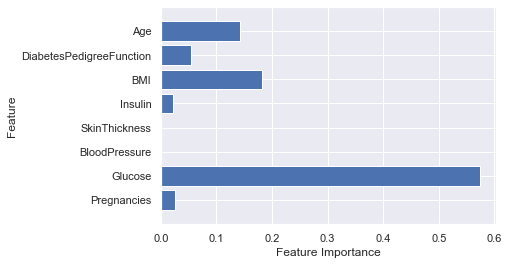

In [88]:
plot_feature_importance_diabetes(gbrt2)

In [89]:
gbrt3 = GradientBoostingClassifier(random_state=0, learning_rate=0.15)

In [90]:
gbrt3.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.15, random_state=0)

In [91]:
print("Accuracy on Training set: {:.3f}".format(gbrt3.score(X_train, y_train)))
print("Accuracy on Test set: {:.3f}".format(gbrt3.score(X_test, y_test)))

Accuracy on Training set: 0.942
Accuracy on Test set: 0.846


<h2>Neural Networks (Deep Learning)</h2>